In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import normal_modes as nm

Define the kinetic energy matrix

In [2]:
def t_mat(m, M):
    
    return np.diag([m, M, m])


In [3]:
def t_inv_mat(m, M):
   
    return np.diag([1.0/m, 1.0/M, 1.0/m])

Define potential energy matrix

In [6]:
def v_mat(k):
  
    return k*np.array([[1.0, -1.0, 0.0], [-1.0, 2.0, -1.0], [0.0, -1.0, 1.0]])

Function to get normal modes

In [7]:
def fun(y, t, m, M, k):
    
    w = -np.dot(t_inv_mat(m,M), np.dot(v_mat(k), y[3:]))
    
    return np.concatenate([w[:], y[:3]])

In [8]:
def sol(y_0, t, m, M, k):
    
    return odeint(fun, y_0, t, args=(m, M, k))

Define the case

In [9]:
m = 1
M = 2
k = 4
t_end = 20.0
delt = 12.0
num_points = 400

# this is the initial condition, particles start with zero speed.
#y_0 = np.array([0.0, 0.0, 0.0, -1, 2.0, 1.0])
y_0 = np.array([0.0, 0.0, 0.0, -1, 1.88, 0.0])

In [10]:
time = np.linspace(0.0, t_end, num_points)

In [11]:
soln = sol(y_0, time, m, M, k)

In [12]:
wn = nm.NormalModes(t_mat(m, M), v_mat(k))

In [13]:
print('frequencies are', wn.omega)

frequencies are [  1.40626625e-08   2.00000000e+00   2.82842712e+00]


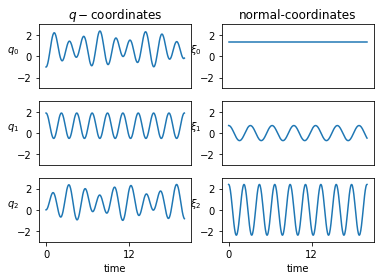

In [14]:
for ind in range(3):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 3 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(3):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 3:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()